In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt

## RWB ANN lag 256

In [2]:
# Load Best Model
test_dir = "datasets/tf_batch/rwb/segment_1 seconds/test_256"
test_ds = tf.data.Dataset.load(test_dir)
model_dir = [f"train_logs/logs2/RWB_ANN/{i}/256/best_model.keras" for i in range(1,6)]

In [3]:
flattened_test = test_ds.unbatch()
test_data = list(flattened_test.as_numpy_iterator())

In [4]:
test_data_value = np.array([test_data[i][0] for i in range(len(test_data))])
test_data_label = np.array([test_data[i][1] for i in range(len(test_data))])

In [5]:
test_data_label.astype(bool)

array([ True, False, False, ...,  True,  True,  True])

In [6]:
results = []

for i, model_path in enumerate(model_dir):
    model = keras.models.load_model(model_path)
    loss, acc = model.evaluate(test_ds)
    print(loss, acc)
    pred = model.predict(test_data_value.reshape(test_data_value.shape[0], -1 ))
    results.append(pred)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8276 - loss: 0.6694 
0.6279826760292053 0.8272913694381714
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8296 - loss: 0.5585 
0.5570335388183594 0.8344733119010925
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8153 - loss: 0.5235 
0.5255746245384216 0.8201094269752502
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8432 - loss: 0.5685
0.5945622324943542 0.8351573348045349
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8281 - loss: 0.5916 
0.550909698009491 0.8276333808898926
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


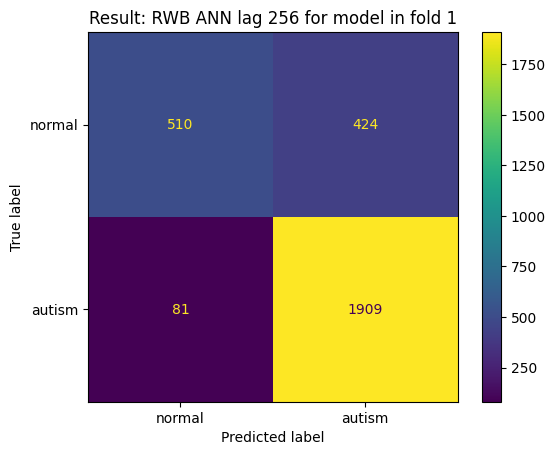

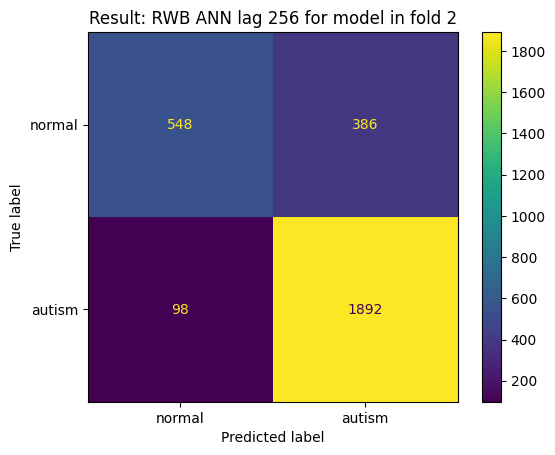

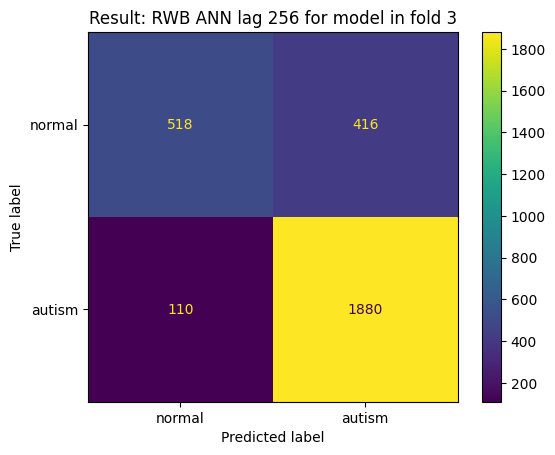

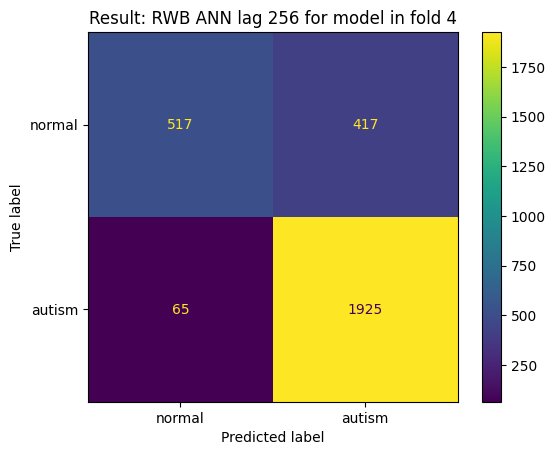

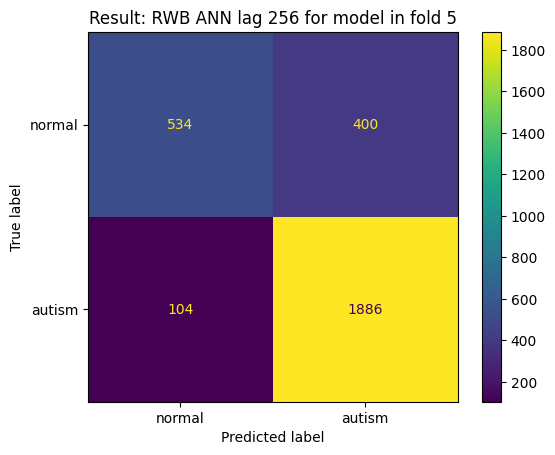

In [7]:
from sklearn import metrics

for i, res in enumerate(results, 1):
    pred = np.round(res.reshape(res.shape[0])).astype(bool)
    confusion_matrix = metrics.confusion_matrix(test_data_label.astype(bool), pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'autism'])
    cm_display.plot()
    plt.title(f"Result: RWB ANN lag 256 for model in fold {i}")
    plt.show()

In [8]:
for i, res in enumerate(results, 1):
    pred = np.round(res.reshape(res.shape[0])).astype(bool)
    test_data_label = test_data_label.astype(bool)  

    print(f"Result: RWB ANN lag 256 for model in fold {i}")

    TP = np.sum((test_data_label == True) & (pred == True))
    FP = np.sum((test_data_label == False) & (pred == True))
    TN = np.sum((test_data_label == False) & (pred == False))
    FN = np.sum((test_data_label == True) & (pred == False))  

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1_score}")
    print("\n")

Result: RWB ANN lag 256 for model in fold 1
Precision: 0.8182597513930562
Recall: 0.9592964824120603
Accuracy: 0.8272913816689467
F1-score: 0.8831829747860284


Result: RWB ANN lag 256 for model in fold 2
Precision: 0.8305531167690957
Recall: 0.9507537688442211
Accuracy: 0.8344733242134063
F1-score: 0.88659793814433


Result: RWB ANN lag 256 for model in fold 3
Precision: 0.818815331010453
Recall: 0.9447236180904522
Accuracy: 0.820109439124487
F1-score: 0.8772748483434438


Result: RWB ANN lag 256 for model in fold 4
Precision: 0.8219470538001707
Recall: 0.9673366834170855
Accuracy: 0.83515731874145
F1-score: 0.8887349953831948


Result: RWB ANN lag 256 for model in fold 5
Precision: 0.8250218722659668
Recall: 0.9477386934673366
Accuracy: 0.8276333789329685
F1-score: 0.882132834424696




In [18]:
test_label_int = test_data_label.astype(int)
pred_label_int = np.round(results[0].reshape(res.shape[0])).astype(int)

In [9]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# for i, res in enumerate(results, 1):
#     pred = res.reshape(res.shape[0]).astype(bool)
#     test_data_label = test_data_label.astype(bool)

#     print(f"Result: RWB ANN lag 256 for model in fold {i}")
#     # Calculate accuracy
#     accuracy = accuracy_score(test_data_label, pred)
#     print("Accuracy:", accuracy)

#     # Calculate precision
#     precision = precision_score(test_data_label, pred)
#     print("Precision:", precision)

#     # Calculate recall (sensitivity)
#     recall = recall_score(test_data_label, pred)
#     print("Recall (Sensitivity):", recall)

#     # Calculate F1-score
#     f1 = f1_score(test_data_label, pred)
#     print("F1-Score:", f1)
#     print("\n")

## RWB ANN lag 128

In [2]:
# Load Best Model
test_dir = "datasets/tf_batch/rwb/segment_1 seconds/test_128"
test_ds = tf.data.Dataset.load(test_dir)
model_dir = [f"train_logs/logs2/RWB_ANN_128/{i}/128/best_model.keras" for i in range(1,6)]

In [3]:
flattened_test = test_ds.unbatch()
test_data = list(flattened_test.as_numpy_iterator())

In [4]:
test_data_value = np.array([test_data[i][0] for i in range(len(test_data))])
test_data_label = np.array([test_data[i][1] for i in range(len(test_data))])

In [5]:
results = []

for i, model_path in enumerate(model_dir):
    model = keras.models.load_model(model_path)
    loss, acc = model.evaluate(test_ds)
    print(loss, acc)
    pred = model.predict(test_data_value.reshape(test_data_value.shape[0], -1 ))
    results.append(pred)

92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.7796 - loss: 0.5947  
0.5867065191268921 0.7862517237663269
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7795 - loss: 0.7240 
0.7018903493881226 0.7951436638832092
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7971 - loss: 0.8139 
0.8951025009155273 0.804377555847168
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7822 - loss: 0.7721
0.8337181806564331 0.7910396456718445
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7793 - loss: 0.8207 
0.835166335105896 0.7872776985168457
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


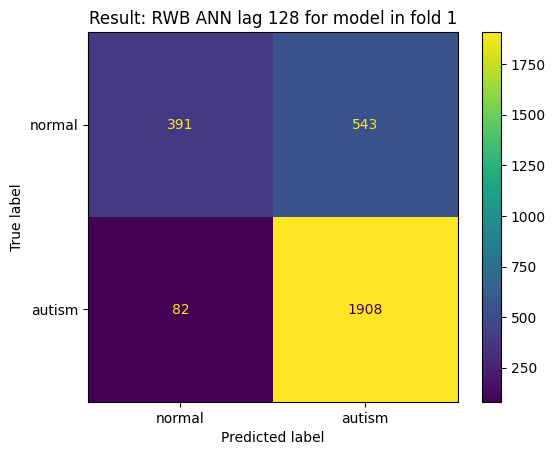

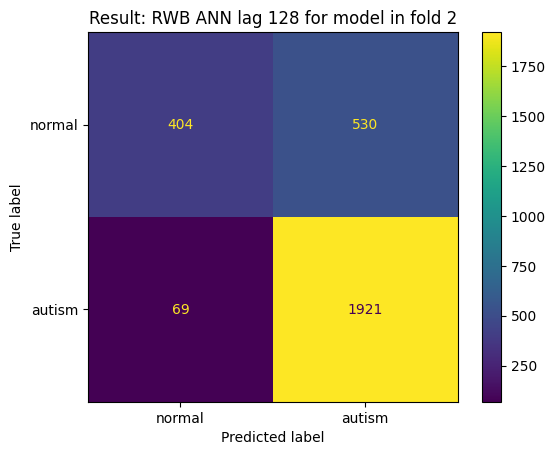

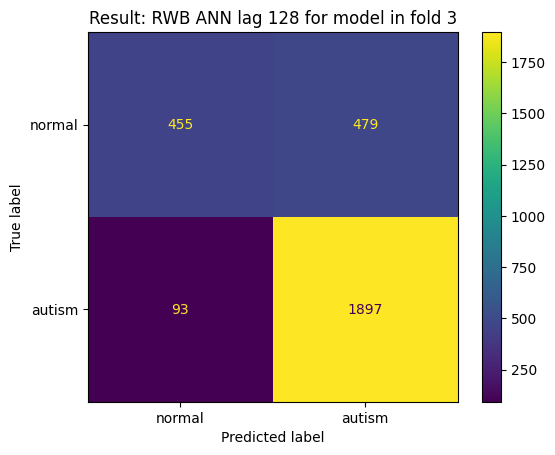

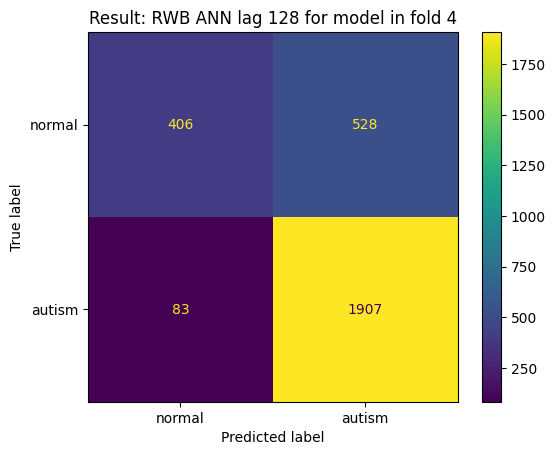

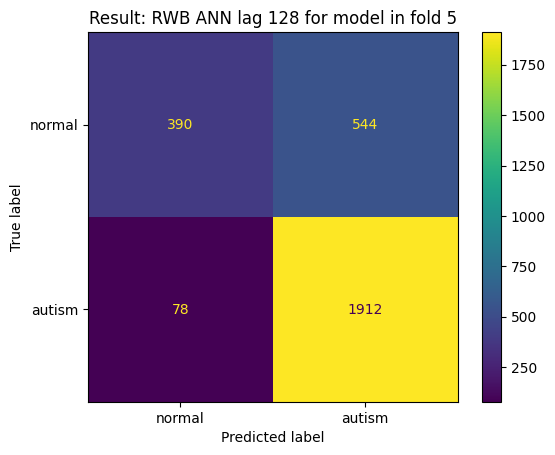

In [6]:
from sklearn import metrics

for i, res in enumerate(results, 1):
    pred = np.round(res.reshape(res.shape[0])).astype(bool)
    confusion_matrix = metrics.confusion_matrix(test_data_label, pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'autism'])
    cm_display.plot()
    plt.title(f"Result: RWB ANN lag 128 for model in fold {i}")
    plt.show()

In [7]:
for i, res in enumerate(results, 1):
    pred = np.round(res.reshape(res.shape[0])).astype(bool)
    test_data_label = test_data_label.astype(bool)  

    print(f"Result: RWB ANN lag 128 for model in fold {i}")

    TP = np.sum((test_data_label == True) & (pred == True))
    FP = np.sum((test_data_label == False) & (pred == True))
    TN = np.sum((test_data_label == False) & (pred == False))
    FN = np.sum((test_data_label == True) & (pred == False))  

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Accuracy: {accuracy}")
    print(f"F1-score: {f1_score}")
    print("\n")

Result: RWB ANN lag 128 for model in fold 1
Precision: 0.7784577723378213
Recall: 0.9587939698492463
Accuracy: 0.7862517099863201
F1-score: 0.8592659310966


Result: RWB ANN lag 128 for model in fold 2
Precision: 0.7837617299061608
Recall: 0.9653266331658291
Accuracy: 0.7951436388508892
F1-score: 0.8651204683629814


Result: RWB ANN lag 128 for model in fold 3
Precision: 0.7984006734006734
Recall: 0.9532663316582914
Accuracy: 0.8043775649794802
F1-score: 0.8689876316994961


Result: RWB ANN lag 128 for model in fold 4
Precision: 0.7831622176591376
Recall: 0.9582914572864322
Accuracy: 0.7910396716826266
F1-score: 0.8619209039548023


Result: RWB ANN lag 128 for model in fold 5
Precision: 0.7785016286644951
Recall: 0.9608040201005025
Accuracy: 0.7872777017783857
F1-score: 0.8600989653621233




In [8]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# for i, res in enumerate(results, 1):
#     pred = res.reshape(res.shape[0]).astype('int64')

#     print(f"Result: RWB ANN lag 128 for model in fold {i}")
#     # Calculate accuracy
#     accuracy = accuracy_score(test_data_label, pred)
#     print("Accuracy:", accuracy)

#     # Calculate precision
#     precision = precision_score(test_data_label, pred)
#     print("Precision:", precision)

#     # Calculate recall (sensitivity)
#     recall = recall_score(test_data_label, pred)
#     print("Recall (Sensitivity):", recall)

#     # Calculate F1-score
#     f1 = f1_score(test_data_label, pred)
#     print("F1-Score:", f1)
#     print("\n")